In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import magic_launcher as magic
from sklearn import linear_model
from pprint import pprint as pretty

In [2]:
dataset = magic.getDataset()
#dataset = dataset[dataset.rarity == 'common']
#dataset = dataset[(dataset.type.str.contains('Creature')) & ~(dataset.subtype.str.contains(' '))]
#subtype_list = dataset.subtype.unique()[dataset.subtype.value_counts() > 50]
#dataset = dataset[dataset.subtype.isin(subtype_list)]

In [3]:
'''Prix inférieurs à une valeur donnée'''
#dataset.price_usd = np.log(dataset.price_usd)

'Prix inférieurs à une valeur donnée'

In [4]:
'''On explose les colonnes qui en ont besoin'''
dataset = magic.explode(dataset, 'subtype', ' ')

In [5]:
quantity_var = 'power'
quality_var = 'subtype'
dataset = dataset.dropna(subset=[quantity_var, quality_var])

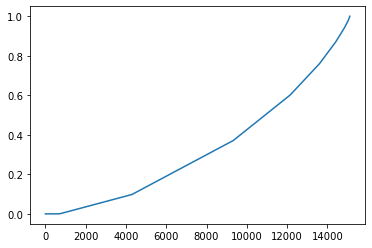

In [6]:
lorenz = np.cumsum(dataset[quantity_var].sort_values().dropna()) / dataset[quantity_var].dropna().sum()
plt.plot(lorenz.tolist())

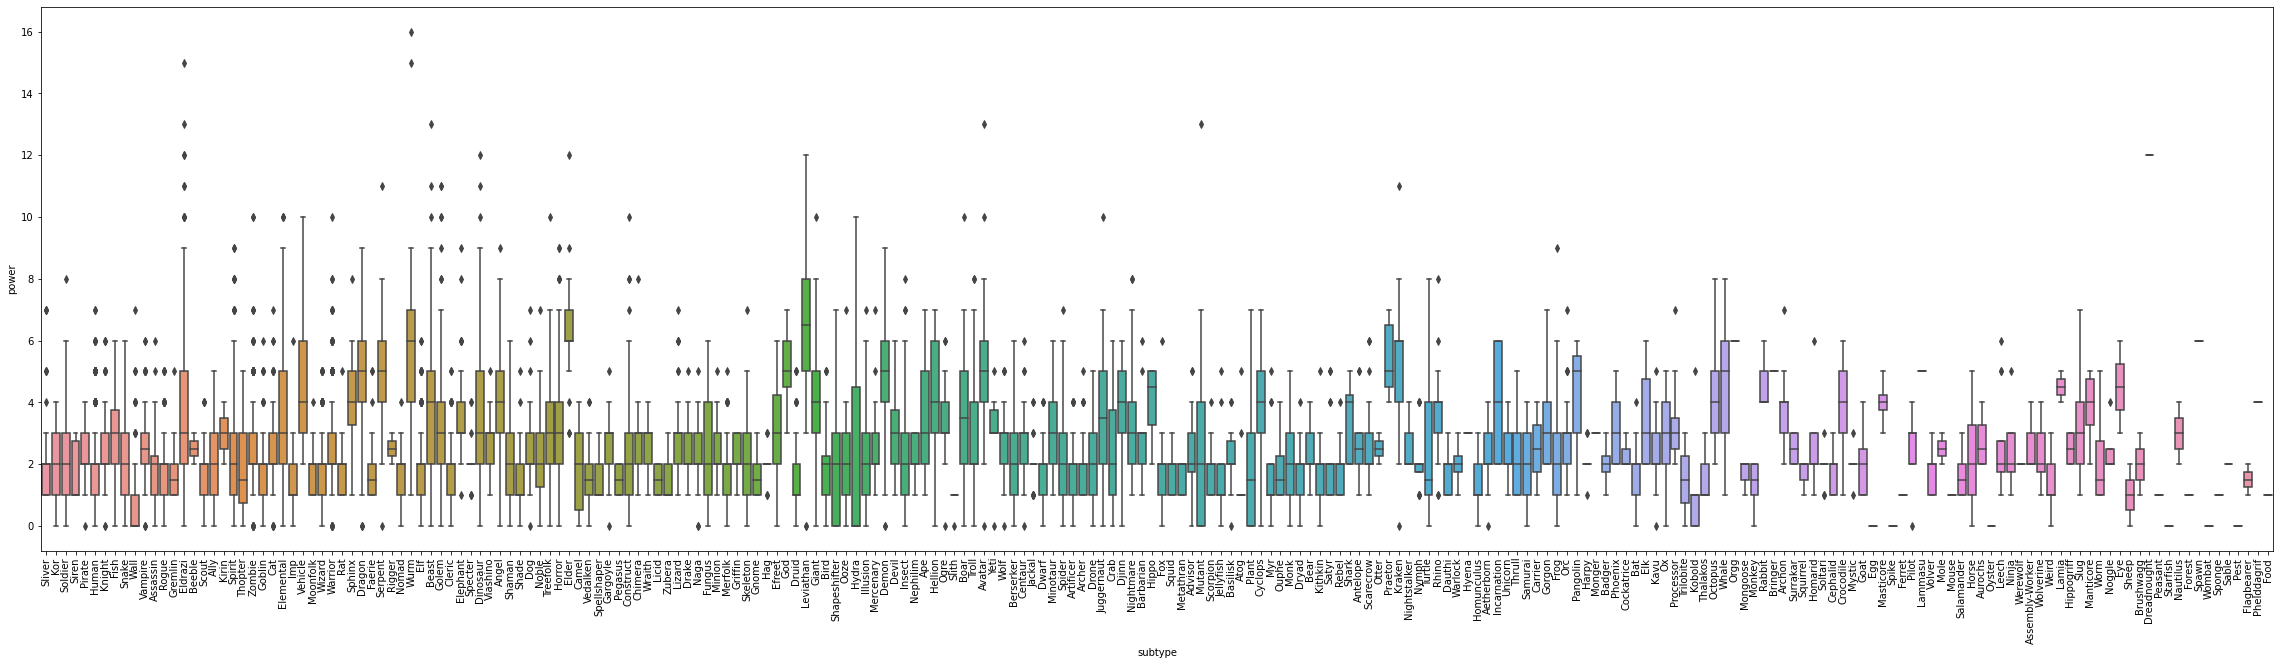

In [7]:
fig_dims = (40, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.boxplot(x=quality_var, y=quantity_var, data=dataset, ax=ax)
f = plt.xticks(rotation=90)

In [8]:
def eta_squared(x,y, data):
    moyenne_y = data[y].mean()
    classes = []
    for classe in data[x].unique():
        yi_classe = data[data[x] == classe][y]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
        
    SCT = sum([(yj-moyenne_y)**2 for yj in data[y]])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [9]:
eta_squared(quality_var, quantity_var, dataset)

0.30497143643044256